# Лабораторная работа: Аппроксимация и линеаризация функций

## Вспомогательные функции:
Реализовать функцию, вычисляющую среднеквадратичное отклонение (СКО) набора числовых данных

In [1]:
import numpy as np
import matplotlib.pyplot as plt

def rmse(y_true, y_pred):
    """Вычисляет среднеквадратичное отклонение (Root Mean Square Error - RMSE)"""
    return np.sqrt(np.mean((y_true - y_pred)**2))

def r_squared(y_true, y_pred):
    """Вычисляет коэффициент детерминации R^2"""
    ss_total = np.sum((y_true - np.mean(y_true))**2)
    ss_residual = np.sum((y_true - y_pred)**2)
    return 1 - (ss_residual / ss_total)


# 1: Линейная аппроксимация (МНК)

## Описание
Изучается процесс нагрева воды в электрическом чайнике. Измеряется температура воды 
T в градусах Цельсия в зависимости от времени нагрева 
t в минутах. Из-за постоянного поступления тепла температура воды растёт почти линейно на начальном этапе.

### Задача
- Определить коэффициенты \(a\) и \(b\),
- Построить график зависимости температуры от времени, отображая экспериментальные точки и линию аппроксимации,
- Рассчитать среднеквадратичное отклонение (СКО) между экспериментальными и расчетными значениями температуры, чтобы проверить точность модели.


## Исходные данные

### Результаты линейной аппроксимации ###
Коэффициенты: a = 2.434, b = 19.905
Уравнение аппроксимации: T = 2.434 * t + 19.905
Среднеквадратичное отклонение (СКО): 0.058 °C


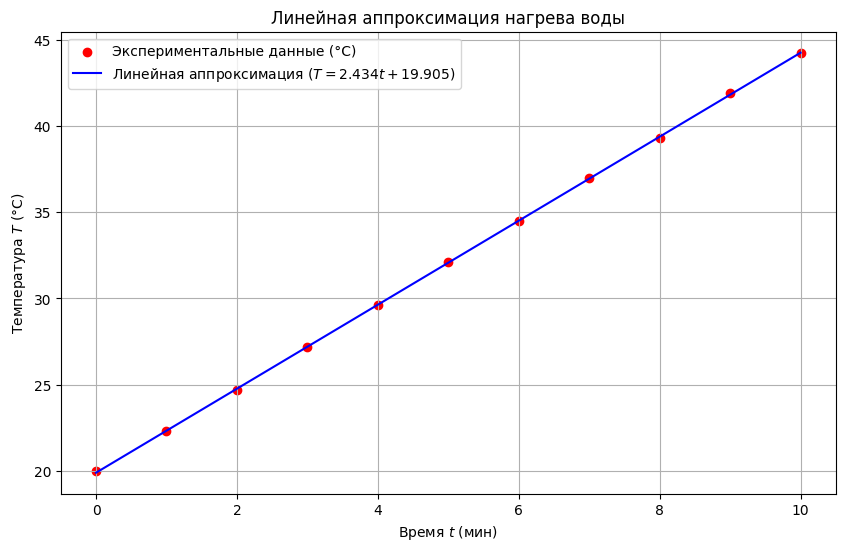

In [2]:
# Данные: время нагрева (мин) и температура (°C)
t = np.array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
T = np.array([20.0, 22.3, 24.7, 27.2, 29.6, 32.1, 34.5, 37.0, 39.3, 41.9, 44.2])

# 1. Определить коэффициенты a и b (Метод наименьших квадратов, полином 1-й степени)
coefficients = np.polyfit(t, T, 1)
a, b = coefficients

# Расчетные значения температуры
T_pred = a * t + b

# 3. Рассчитать среднеквадратичное отклонение (СКО)
rmse_T = rmse(T, T_pred)


print(f"### Результаты линейной аппроксимации ###")
print(f"Коэффициенты: a = {a:.3f}, b = {b:.3f}")
print(f"Уравнение аппроксимации: T = {a:.3f} * t + {b:.3f}")
print(f"Среднеквадратичное отклонение (СКО): {rmse_T:.3f} °C")


# 2. Построить график
plt.figure(figsize=(10, 6))
plt.scatter(t, T, color='red', label='Экспериментальные данные (°C)')
plt.plot(t, T_pred, color='blue', label=f'Линейная аппроксимация ($T = {a:.3f}t + {b:.3f}$)')
plt.title('Линейная аппроксимация нагрева воды')
plt.xlabel('Время $t$ (мин)')
plt.ylabel('Температура $T$ (\u00b0C)')
plt.grid(True)
plt.legend()
plt.savefig('task1_linear_approx.png')


# 2: Линеаризация экспоненциальной функции

## Описание
Изучается процесс разрядки аккумулятора мобильного устройства. Известно, что напряжение аккумулятора \( V(t) \) со временем уменьшается по экспоненциальному закону:
$V(t) = a \cdot e^{bt}$

Требуется:
- Линеаризовать экспоненциальную функцию,
- Найти параметры \( a \) и \( b \),
- Построить график зависимости напряжения от времени (экспериментальные данные и аппроксимация),
- Спрогнозировать дальнейшее падение напряжения,
- Рассчитать среднеквадратичное отклонение (СКО).

## Исходные данные

In [3]:
# Данные разрядки аккумулятора
hours = np.array([1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16])
voltage = np.array([4.15, 4.09, 4.02, 3.96, 3.89, 3.83, 3.76, 3.70, 3.64, 3.58, 3.52, 3.47, 3.43, 3.40, 3.38, 3.37])

## Процесс линеаризации

**Шаг 1:** Исходная функция: $V(t) = a \cdot e^{bt}$

**Шаг 2:** Логарифмируем обе части:
$\ln(V) = \ln(a) + bt$

**Шаг 3:** Делаем замены: $g = \ln(V)$, $t = t$, $c = \ln(a)$, $d = b$

**Шаг 4:** Получаем линейную функцию: $g = c + d \cdot t$


### Результаты экспоненциальной аппроксимации ###
Исходные параметры: a = 4.188, b = -0.0149
Уравнение аппроксимации: V(t) = 4.188 * e^(-0.0149 * t)
Среднеквадратичное отклонение (СКО): 0.0274 В
Прогноз напряжения в час t=17: 3.252 В


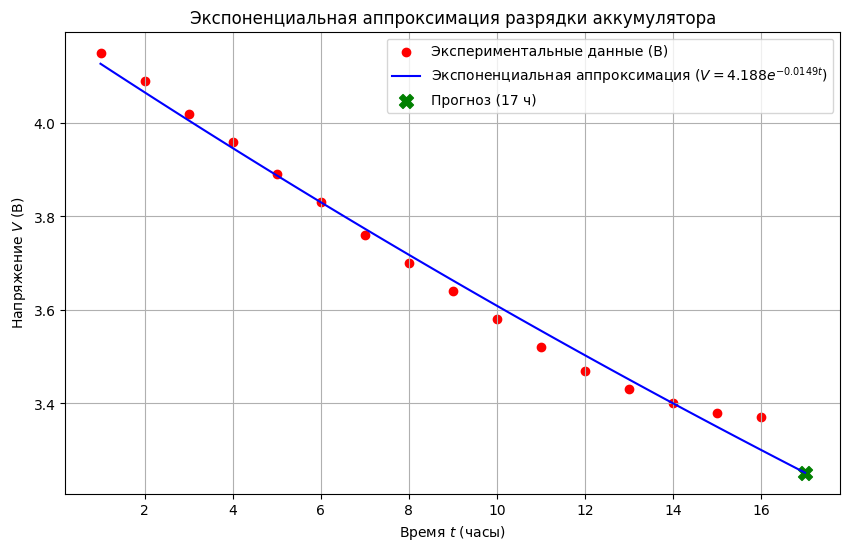

In [4]:
# Линеаризация
g = np.log(voltage)  # g = ln(V)
t_lin = hours        # t_lin = t

# Линейная аппроксимация в линеаризованных координатах (g = d*t_lin + c)
linear_coeffs = np.polyfit(t_lin, g, 1)
d, c = linear_coeffs # d = b, c = ln(a)

# Восстановление исходных параметров
b = d
a = np.exp(c)

# Расчетные значения напряжения в исходных координатах
V_pred = a * np.exp(b * hours)

# Расчет СКО
rmse_V = rmse(voltage, V_pred)

# Прогноз на следующий час (t=17)
t_forecast = 17
V_forecast = a * np.exp(b * t_forecast)

print(f"\n### Результаты экспоненциальной аппроксимации ###")
print(f"Исходные параметры: a = {a:.3f}, b = {b:.4f}")
print(f"Уравнение аппроксимации: V(t) = {a:.3f} * e^({b:.4f} * t)")
print(f"Среднеквадратичное отклонение (СКО): {rmse_V:.4f} В")
print(f"Прогноз напряжения в час t={t_forecast}: {V_forecast:.3f} В")

# Построение графика
t_plot = np.linspace(hours.min(), t_forecast, 100)
V_plot = a * np.exp(b * t_plot)

plt.figure(figsize=(10, 6))
plt.scatter(hours, voltage, color='red', label='Экспериментальные данные (В)')
plt.plot(t_plot, V_plot, color='blue', label=f'Экспоненциальная аппроксимация ($V = {a:.3f}e^{{{b:.4f}t}}$)')
plt.scatter(t_forecast, V_forecast, color='green', marker='X', s=100, label=f'Прогноз ({t_forecast} ч)')
plt.title('Экспоненциальная аппроксимация разрядки аккумулятора')
plt.xlabel('Время $t$ (часы)')
plt.ylabel('Напряжение $V$ (В)')
plt.grid(True)
plt.legend()
plt.savefig('task2_exp_approx.png')

# Вариант задание выбирается Номер в списке % 3

# Задание 3 Вариант 0

**Выбран согласно Номер в списке (3) $\pmod{3} = 0$**

## Описание задачи
При исследовании зависимости силы трения от нормальной нагрузки получены следующие экспериментальные данные:

| Нормальная сила (Н) $N$ | 1 | 2 | 3 | 5 | 8 | 10 | 15 | 20 |
|---|---|---|---|---|---|---|---|---|
| Сила трения (Н) $f$ | 0.30 | 0.88 | 1.65 | 4.08 | 10.21 | 15.95 | 35.70 | 63.50 |

## Задание
1. Предположите **степенную функцию** вида $f = c \cdot N^\alpha$.
2. Выполните **логарифмическую линеаризацию**: прологарифмируйте обе части уравнения и получите $\ln f = \ln c + \alpha \ln N$.
3. Постройте **линейную регрессию** для преобразованных координат $(\ln N, \ln f)$.
4. Найдите параметры $c$ и $\alpha$, вычислите $R^2$.
5. Постройте **графики** в логарифмических координатах (линия регрессии) и в исходных координатах (степенная функция через исходные данные).
6. Используя полученную модель, предскажите силу трения при нормальной силе 25 Н.

---



### Результаты линеаризации степенной функции (Вариант 0) ###
Параметры степенной функции: c = 0.256, alpha = 1.802
Уравнение аппроксимации: f = 0.256 * N^(1.802)
Коэффициент детерминации R^2 (линеаризованная модель): 0.9968
Прогноз силы трения при N=25 Н: 84.51 Н


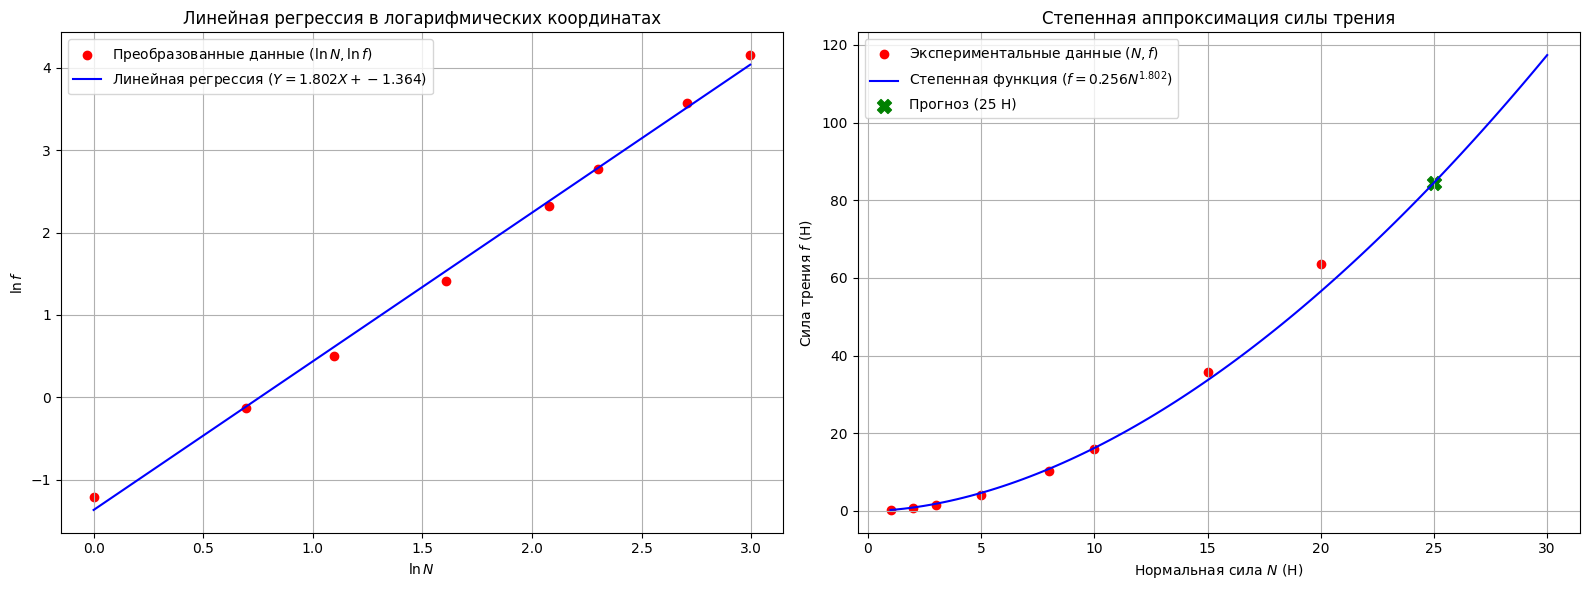

In [5]:
# Исходные данные
N = np.array([1, 2, 3, 5, 8, 10, 15, 20])
f = np.array([0.30, 0.88, 1.65, 4.08, 10.21, 15.95, 35.70, 63.50])

# 2. Логарифмическая линеаризация: ln(f) = ln(c) + alpha * ln(N)
ln_N = np.log(N)  # Новая независимая переменная X = ln(N)
ln_f = np.log(f)  # Новая зависимая переменная Y = ln(f)

# 3. Линейная регрессия для преобразованных координат Y = alpha * X + ln(c)
linear_coeffs_pow = np.polyfit(ln_N, ln_f, 1)
alpha, ln_c = linear_coeffs_pow

# 4. Найти параметры c и alpha
c = np.exp(ln_c)

# Расчетные значения в линеаризованных координатах
ln_f_pred = alpha * ln_N + ln_c

# Расчет R^2 для линеаризованной модели
r2_lin = r_squared(ln_f, ln_f_pred)

# Расчетные значения в исходных координатах
f_pred = c * N**alpha


print(f"\n### Результаты линеаризации степенной функции (Вариант 0) ###")
print(f"Параметры степенной функции: c = {c:.3f}, alpha = {alpha:.3f}")
print(f"Уравнение аппроксимации: f = {c:.3f} * N^({alpha:.3f})")
print(f"Коэффициент детерминации R^2 (линеаризованная модель): {r2_lin:.4f}")

# 6. Прогноз силы трения при N = 25 Н
N_forecast = 25
f_forecast = c * N_forecast**alpha
print(f"Прогноз силы трения при N={N_forecast} Н: {f_forecast:.2f} Н")

# 5. Построение графиков
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# График 1: Логарифмические координаты (линейная регрессия). Использованы СЫРЫЕ СТРОКИ (r'...') для LaTeX меток
axes[0].scatter(ln_N, ln_f, color='red', label=r'Преобразованные данные $(\ln N, \ln f)$')
axes[0].plot(ln_N, ln_f_pred, color='blue', label=f'Линейная регрессия ($Y = {alpha:.3f}X + {ln_c:.3f}$)')
axes[0].set_title('Линейная регрессия в логарифмических координатах')
axes[0].set_xlabel(r'$\ln N$')
axes[0].set_ylabel(r'$\ln f$')
axes[0].grid(True)
axes[0].legend()

# График 2: Исходные координаты (степенная функция)
N_plot = np.linspace(N.min(), N_forecast + 5, 100)
f_plot = c * N_plot**alpha

axes[1].scatter(N, f, color='red', label='Экспериментальные данные $(N, f)$')
axes[1].plot(N_plot, f_plot, color='blue', label=f'Степенная функция ($f = {c:.3f}N^{{{alpha:.3f}}}$)')
axes[1].scatter(N_forecast, f_forecast, color='green', marker='X', s=100, label=f'Прогноз ({N_forecast} Н)')
axes[1].set_title('Степенная аппроксимация силы трения')
axes[1].set_xlabel('Нормальная сила $N$ (Н)')
axes[1].set_ylabel('Сила трения $f$ (Н)')
axes[1].grid(True)
axes[1].legend()

plt.tight_layout()
plt.savefig('task3_power_approx.png')